In [5]:
#install Kaggle
!pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aditi0729","key":"f21fa00923c47e6833f86e8b129dc64a"}'}

In [7]:
#create a Kaggle folder
! mkdir ~/.kaggle

In [8]:
#copy the Kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [9]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36            939        108  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           3367         73  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1340        105  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT P

In [11]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:20<00:00, 122MB/s] 
100% 2.29G/2.29G [00:20<00:00, 119MB/s]


In [12]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [14]:
# Dataset Link- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [15]:
# For local system
path = '/content/chest_xray/chest_xray/train'
classes = os.listdir(path)
print(classes)




['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [16]:
# Define the directories for the X-ray images
PNEUMONIA_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])

# Create lists of the file names in each directory
pneumonia_names = os.listdir(path)
normal_names = os.listdir(path)

print('There are ', len(pneumonia_names),
	'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')


There are  3 images of pneumonia infected in training dataset
There are  3 normal images in training dataset


In [17]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
					for fname in pneumonia_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()


<Figure size 1600x800 with 0 Axes>

In [18]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


<Figure size 1600x800 with 0 Axes>

In [19]:
Train = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/train',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/test',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/val',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

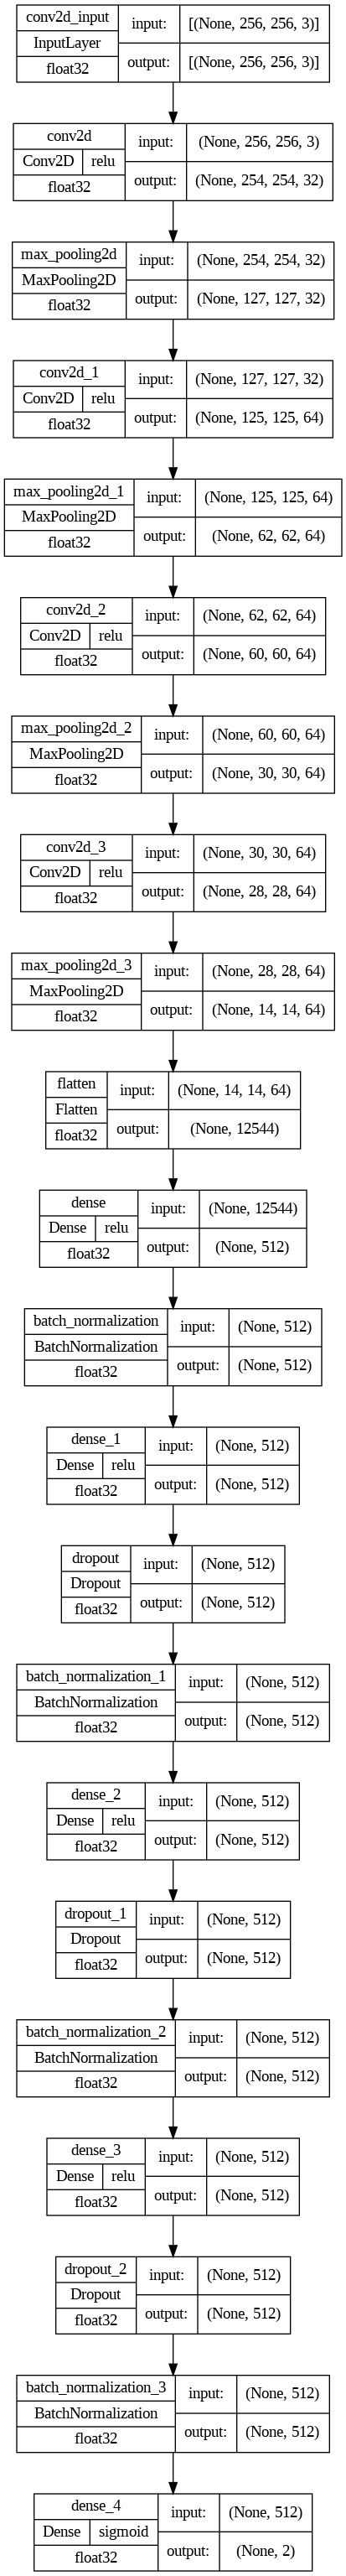

In [22]:
# Plot the keras model
keras.utils.plot_model(
	model,
	# show the shapes of the input/output tensors of each layer
	show_shapes=True,
	# show the data types of the input/output tensors of each layer
	show_dtype=True,
	# show the activations of each layer in the output graph
	show_layer_activations=True
)


In [23]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [24]:
history = model.fit(Train,
		epochs=10,
		validation_data=Validation)


Epoch 1/10
163/163 [==============================] - 394s 2s/step - loss: 0.2424 - accuracy: 0.9224 - val_loss: 1.0233 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 389s 2s/step - loss: 0.1536 - accuracy: 0.9515 - val_loss: 1.4892 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 385s 2s/step - loss: 0.1236 - accuracy: 0.9594 - val_loss: 5.7185 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 394s 2s/step - loss: 0.1087 - accuracy: 0.9622 - val_loss: 0.1802 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 394s 2s/step - loss: 0.1046 - accuracy: 0.9607 - val_loss: 12.2810 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 385s 2s/step - loss: 0.0971 - accuracy: 0.9659 - val_loss: 5.1151 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 392s 2s/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 6.8224 - val_accuracy: 0.500

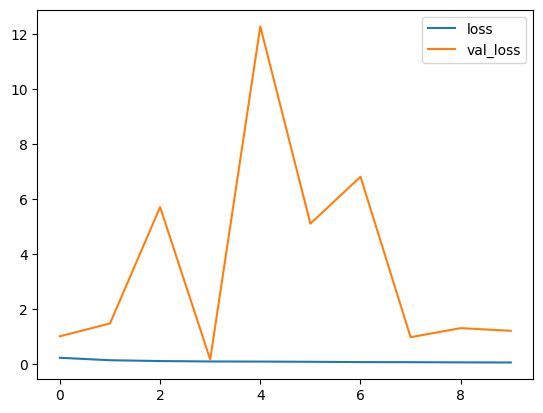

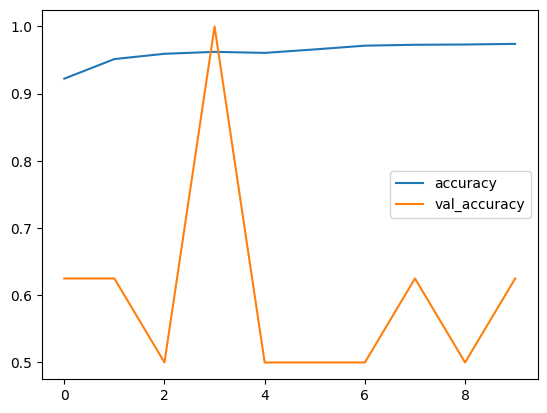

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [26]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))


20/20 [==============================] - 15s 692ms/step - loss: 1.8795 - accuracy: 0.7115
The accuracy of the model on test dataset is 71.0


1/1 [==============================] - 1s 1s/step
Normal


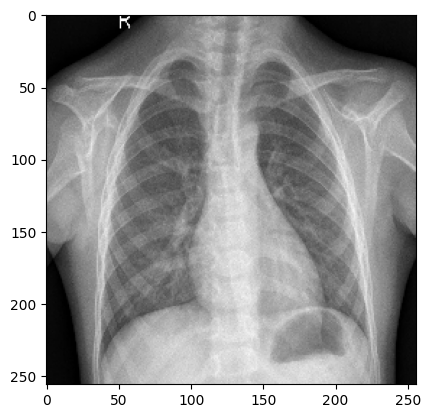

In [27]:
test_image = tf.keras.utils.load_img(
	"/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg",
	target_size=(256, 256))
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
class_probabilities = result[0]
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")


1/1 [==============================] - 0s 37ms/step
Pneumonia


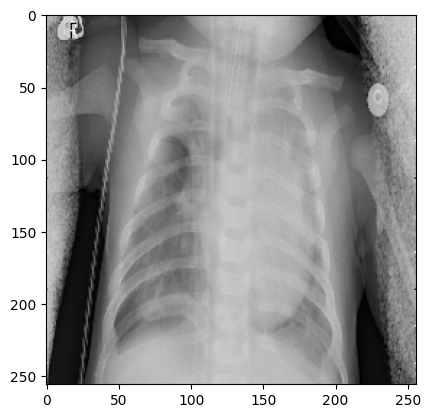

In [28]:
test_image = tf.keras.utils.load_img(
	"/content/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg",
	target_size=(256, 256))
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
class_probabilities = result[0]
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")


In [30]:
def predictpnemonia(img):
  test_image = tf.keras.utils.load_img(img,target_size=(256, 256))
  plt.imshow(test_image)
  test_image = tf.keras.utils.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  result = model.predict(test_image)
  class_probabilities = result[0]
  if class_probabilities[0] > class_probabilities[1]:
    print("Normal")
  else:
    print("Pneumonia")


1/1 [==============================] - 0s 38ms/step
Pneumonia


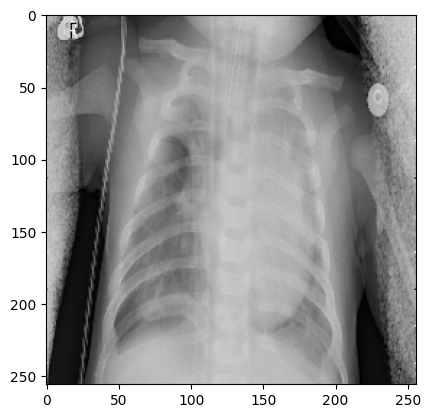

In [31]:
predictpnemonia("/content/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg")

In [29]:
# loading library
import pickle

In [32]:
pickle.dump(predictpnemonia,open('predictpnemonia.pkl','wb'))